In [142]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
%matplotlib inline

In [160]:
stopwords = set(ENGLISH_STOP_WORDS.copy())
stopwords.update(['bitch', 'fuck', 'nigga', 'niggas', 'motherfucker'])

In [2]:
# raw df, 46000 songs
with open('grand_frame.pkl', 'rb') as readfile:
    grand_frame = pickle.load(readfile)

In [8]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Punct and Lower
    nopunc = [char.lower() for char in mess if char not in string.punctuation]

    # Numbers
    nonumb = [char for char in nopunc if char not in '0123456789']
    
    # Join the characters again to form the string.
    clean = ''.join(nonumb)
    
    # Now just remove any stopwords
    
    return [word.split('\\')[0] for word in clean.split() if word.lower() not in stopwords.words('english')]

## Frame reduction

In [3]:
# column for main artist, ignoring featured artists
grand_frame['primary'] = grand_frame['artist'].apply(lambda x: x[0])

In [4]:
# create separate df with value counts
counts_df = grand_frame['primary'].value_counts()

value_frame = pd.DataFrame({ 'primary': counts_df.index.tolist(), 
                             'counts': counts_df.values.tolist() })

In [5]:
# merge two dfs to add 'primary artist' and 'value counts' columns
final_frame = pd.merge(grand_frame,value_frame, on='primary')

In [6]:
# drop songs with artists who do not appear at least 10 times in df
ten_frame = final_frame[final_frame['counts'] > 10]

In [ ]:
##with open('ten_frame.pkl', 'wb') as writefile:
##    pickle.dump(ten_frame, writefile)

In [83]:
with open('foreign_removed.pkl', 'rb') as readfile:
     ten_frame = pickle.load(readfile)

#### Vectorize

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
Tvectorizer = TfidfVectorizer(analyzer=text_process, min_df=.01, max_df=1000, max_features=20000)

In [ ]:
tfidf = Tvectorizer.fit_transform(ten_frame['lyrics'])

In [ ]:
##with open('tfidf.pkl', 'wb') as writefile:
##    pickle.dump(tfidf, writefile)

#### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
prin_var = pca.fit(tfidf.toarray()) 
principal = pca.fit_transform(tfidf.toarray())

In [ ]:
pvars = prin_var.explained_variance_

In [ ]:
plt.plot(range(1,len(pvars)+1),pvars)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

#### KMEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# determine number of clusters
n_inertia = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal)
    pca_clusters_array = km.predict(principal)
    inertia = km.inertia_
    n_inertia.append(inertia)

In [ ]:
plt.plot(range(1,15),n_inertia)

## By Era

In [84]:
frame_10 = ten_frame[(ten_frame['date'] >= 2010)]
frame_00 = ten_frame[(ten_frame['date'] > 1999) & (ten_frame['date'] < 2010)]
frame_90 = ten_frame[(ten_frame['date'] > 1989) & (ten_frame['date'] < 2000)]
frame_80 = ten_frame[(ten_frame['date'] < 1990)]

In [165]:
Cvectorizer10 = CountVectorizer(analyzer='word', min_df=.01, max_features=20000, 
                                stop_words= stopwords)
Cvectorizer00 = CountVectorizer(analyzer='word', min_df=.01, max_features=20000, 
                                stop_words= stopwords)
Cvectorizer90 = CountVectorizer(analyzer='word', min_df=.01, max_features=20000, 
                                stop_words= stopwords)
Cvectorizer80 = CountVectorizer(analyzer='word', min_df=.01, max_features=20000, 
                                stop_words= stopwords)

count10 = Cvectorizer10.fit_transform(frame_10['lyrics'])
count00 = Cvectorizer00.fit_transform(frame_00['lyrics'])
count90 = Cvectorizer90.fit_transform(frame_90['lyrics'])
count80 = Cvectorizer80.fit_transform(frame_80['lyrics'])

In [113]:
Tvectorizer10 = TfidfVectorizer(analyzer='word', min_df=.01, max_features=20000, 
                                stop_words= ['fuck', 'bitch', 'nigga', 'niggas', 'motherfucker'])
Tvectorizer00 = TfidfVectorizer(analyzer='word', min_df=.01, max_features=20000, 
                                stop_words= ['fuck', 'bitch', 'nigga', 'niggas', 'motherfucker'])
Tvectorizer90 = TfidfVectorizer(analyzer='word', min_df=.01, max_features=20000, 
                                stop_words= ['fuck', 'bitch', 'nigga', 'niggas', 'motherfucker'])
Tvectorizer80 = TfidfVectorizer(analyzer='word', min_df=.01, max_features=20000, 
                                stop_words= ['fuck', 'bitch', 'nigga', 'niggas', 'motherfucker'])

tfidf10 = Tvectorizer10.fit_transform(frame_10['lyrics'])
tfidf00 = Tvectorizer00.fit_transform(frame_00['lyrics'])
tfidf90 = Tvectorizer90.fit_transform(frame_90['lyrics'])
tfidf80 = Tvectorizer80.fit_transform(frame_80['lyrics'])

In [86]:
with open('tfidf10.pkl', 'wb') as writefile:
    pickle.dump(tfidf10, writefile)
with open('tfidf00.pkl', 'wb') as writefile:
    pickle.dump(tfidf00, writefile)
with open('tfidf90.pkl', 'wb') as writefile:
    pickle.dump(tfidf90, writefile)
with open('tfidf80.pkl', 'wb') as writefile:
    pickle.dump(tfidf80, writefile)

In [166]:
vocab10 = Cvectorizer10.get_feature_names()
vocab00 = Cvectorizer00.get_feature_names()
vocab90 = Cvectorizer90.get_feature_names()
vocab80 = Cvectorizer80.get_feature_names()

In [115]:
from sklearn.decomposition import PCA

In [178]:
pca10 = PCA(n_components=2)
prin_var10 = pca10.fit(count10.toarray()) 
principal10 = pca10.fit_transform(count10.toarray())

pca00 = PCA(n_components=2)
prin_var00 = pca00.fit(count00.toarray()) 
principal00 = pca00.fit_transform(count00.toarray())

pca90 = PCA(n_components=5)
prin_var90 = pca90.fit(count90.toarray()) 
principal90 = pca90.fit_transform(count90.toarray())

pca80 = PCA(n_components=5)
prin_var80 = pca80.fit(count80.toarray()) 
principal80 = pca80.fit_transform(count80.toarray())

In [171]:
pvars10 = prin_var10.explained_variance_
pvars00 = prin_var00.explained_variance_
pvars90 = prin_var90.explained_variance_
pvars80 = prin_var80.explained_variance_

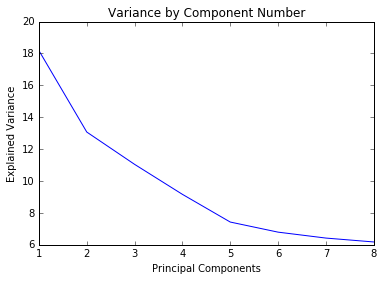

In [177]:
plt.plot(range(1,len(pvars80)+1),pvars80)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

In [179]:
from sklearn.cluster import KMeans

In [180]:
n_inertia10 = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal10)
    pca_clusters_array = km.predict(principal10)
    inertia = km.inertia_
    n_inertia10.append(inertia)
    
n_inertia00 = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal00)
    pca_clusters_array = km.predict(principal00)
    inertia = km.inertia_
    n_inertia00.append(inertia)
    
n_inertia90 = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal90)
    pca_clusters_array = km.predict(principal90)
    inertia = km.inertia_
    n_inertia90.append(inertia)
    
n_inertia80 = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal80)
    pca_clusters_array = km.predict(principal80)
    inertia = km.inertia_
    n_inertia80.append(inertia)

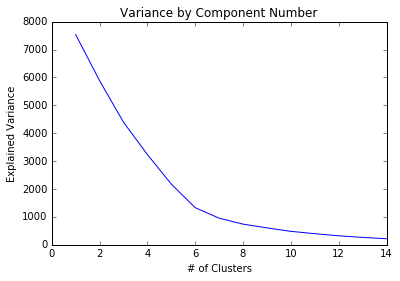

In [188]:
plt.plot(range(1,15),n_inertia80)
plt.xlabel('# of Clusters')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

In [189]:
model10 = KMeans(n_clusters=5).fit(principal10)
model00 = KMeans(n_clusters=5).fit(principal00)
model90 = KMeans(n_clusters=4).fit(principal90)
model80 = KMeans(n_clusters=6).fit(principal80)

In [190]:
kmean10 = model10.predict(principal10)
kmean00 = model00.predict(principal00)
kmean90 = model90.predict(principal90)
kmean80 = model80.predict(principal80)

In [191]:
frame_10['kmean_pca'] = kmean10
frame_00['kmean_pca'] = kmean00
frame_90['kmean_pca'] = kmean90
frame_80['kmean_pca'] = kmean80

/home/elrazia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/elrazia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/elrazia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [218]:
frame_80.kmean_pca.value_counts()

1    72
0    43
5     7
4     2
3     2
2     2
Name: kmean_pca, dtype: int64

In [221]:
frame_80[frame_80['kmean_pca'] == 1].primary.value_counts()

Big Daddy Kane                            21
Sir Mix-a-Lot                             12
Biz Markie                                 7
Too $hort                                  6
Kool Moe Dee                               5
Queen Latifah                              4
Schoolly D                                 3
Ice-T                                      3
Mac Dre                                    2
Kool G. Rap & DJ Polo                      2
Young MC                                   2
King Los                                   1
The Supreme Court of the United States     1
Rakim                                      1
Marley Marl                                1
Eric B. & Rakim                            1
Name: primary, dtype: int64

#### LDA

In [79]:
from sklearn.decomposition import LatentDirichletAllocation

In [212]:
lda10 = LatentDirichletAllocation(n_topics=5, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0)
lda00 = LatentDirichletAllocation(n_topics=5, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0)
lda90 = LatentDirichletAllocation(n_topics=4, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0)
lda80 = LatentDirichletAllocation(n_topics=6, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0)
lda10.fit(count10)
lda00.fit(count00)
lda90.fit(count90)
lda80.fit(count80)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=6, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [213]:
topic_word10 = lda10.components_
topic_word00 = lda00.components_
topic_word90 = lda90.components_
topic_word80 = lda80.components_

In [217]:
n_top_words = 10
for i, topic_dist in enumerate(topic_word80):
    topic_words = np.array(vocab80)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: like cause just make don ll let man say big
Topic 1: cause like don ll ain just say got money make
Topic 2: like got girl don cause getting em posse right good
Topic 3: like got said don just say big curse way rap
Topic 4: like em ll rhyme kane melody time don make drop
Topic 5: don di man rhyme like ll hey know mic time


#### NMF

In [132]:
from sklearn.decomposition import NMF

In [138]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 8

In [134]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [135]:
nmf10 = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(tfidf10)
nmf00 = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(tfidf00)
nmf90 = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(tfidf90)
nmf80 = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(tfidf80)

In [140]:
print_top_words(nmf00, vocab00, n_top_words)

Topic #0:
the in of to with and your on
Topic #1:
you your me know re can girl don
Topic #2:
she her girl me love that the pussy
Topic #3:
my like on and me it that the
Topic #4:
to and it the that my he was
()
